# Starter Pack

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
data = pd.read_csv('regression_data.csv')
data.head()

,latitude,longitude,region,state,postcode,geometry,flood_risk,distance,kawasan_banjir,latitude_kb,longitude_kb,kedalaman_banjir,month_kb,altitude,slope,min_distance_river,land_cover,town_distance
0,6.402858,100.098777,Kangar,Perlis,1000,POINT (11142944.906933343 714251.0946146951),False,4245.737601,Kampung Nelayan,6.4040,100.1369,0.6,4.0,0,0.000000,2866.669879,200,11394.621769
1,6.365790,100.188445,Kangar,Perlis,1000,POINT (11152926.669637946 710098.9597010214),False,4532.533863,Kampung Sentua,6.4051,100.1981,0.2,10.0,4,2.075604,2520.893227,40,8220.642421
2,6.360280,100.212395,Kangar,Perlis,1000,POINT (11155592.793706343 709481.7137045604),False,5266.664356,Kampung Sentua,6.4051,100.1981,0.2,10.0,5,2.075599,394.344896,40,9033.156201
3,6.557335,100.314105,Kangar,Perlis,1000,POINT (11166915.132510776 731557.9727265495),False,8652.136771,Taman Beseri Jaya,6.5590,100.2364,0.6,5.0,59,0.933516,2065.659934,126,18796.430267
4,6.395771,100.230483,Kangar,Perlis,1000,POINT (11157606.329523865 713457.2321468537),False,3753.265280,Kampung Sentua,6.4051,100.1981,0.2,10.0,5,0.927410,2072.528557,40,6279.729808


In [164]:
columns = [
    'latitude',
    'longitude',
    'flood_risk',
    'distance',
    'altitude',
    'slope',
    'min_distance_river',
    'land_cover',
    'town_distance'
]

data = data[columns]

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19824 entries, 0 to 19823
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            19824 non-null  float64
 1   longitude           19824 non-null  float64
 2   flood_risk          19824 non-null  bool   
 3   distance            19824 non-null  float64
 4   altitude            19824 non-null  int64  
 5   slope               19824 non-null  float64
 6   min_distance_river  19824 non-null  float64
 7   land_cover          19824 non-null  int64  
 8   town_distance       19824 non-null  float64
dtypes: bool(1), float64(6), int64(2)
memory usage: 1.2 MB


In [166]:
data.describe()

,latitude,longitude,distance,altitude,slope,min_distance_river,land_cover,town_distance
count,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000
mean,4.164278,104.262531,4071.710091,56.894219,5.435004,2022.250157,91.874344,16447.459433
std,1.504161,5.413517,4790.504712,133.190380,6.236697,3017.140770,52.596663,18087.364621
min,1.045992,99.662046,19.253343,-26.000000,0.000000,0.000000,20.000000,181.210220
25%,3.078602,101.263753,1313.426109,8.000000,1.315526,283.937050,50.000000,5802.998856
50%,4.017306,101.890486,2683.402344,21.000000,3.717199,804.854400,50.000000,10951.282859
75%,5.487689,103.339178,4827.023973,46.000000,7.211830,2360.681609,112.000000,18798.056593
max,6.911623,118.651558,66853.687820,1731.000000,61.276810,24676.424201,200.000000,133517.266498


# EDA

In [167]:
# we perform k-means clustering on the geographical coordinates
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15)
data["Cluster"] = kmeans.fit_predict(data[["latitude", "longitude"]])
data["Cluster"] = data["Cluster"].astype("category")

data.head()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


,latitude,longitude,flood_risk,distance,altitude,slope,min_distance_river,land_cover,town_distance,Cluster
0,6.402858,100.098777,False,4245.737601,0,0.000000,2866.669879,200,11394.621769,0
1,6.365790,100.188445,False,4532.533863,4,2.075604,2520.893227,40,8220.642421,0
2,6.360280,100.212395,False,5266.664356,5,2.075599,394.344896,40,9033.156201,0
3,6.557335,100.314105,False,8652.136771,59,0.933516,2065.659934,126,18796.430267,0
4,6.395771,100.230483,False,3753.265280,5,0.927410,2072.528557,40,6279.729808,0


The figure layout has changed to tight


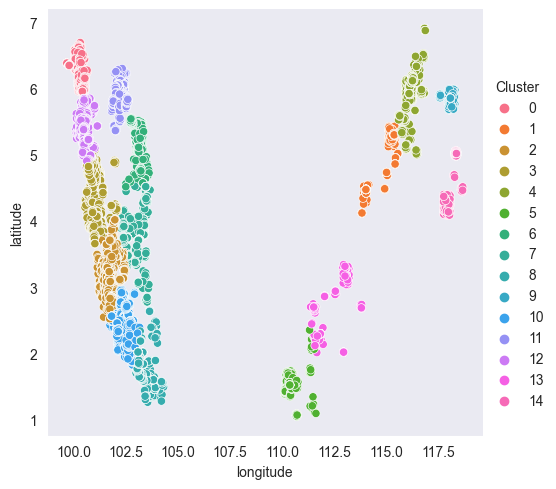

In [168]:
sns.relplot(data = data, x = 'longitude', y = 'latitude', hue = 'Cluster')

The figure layout has changed to tight


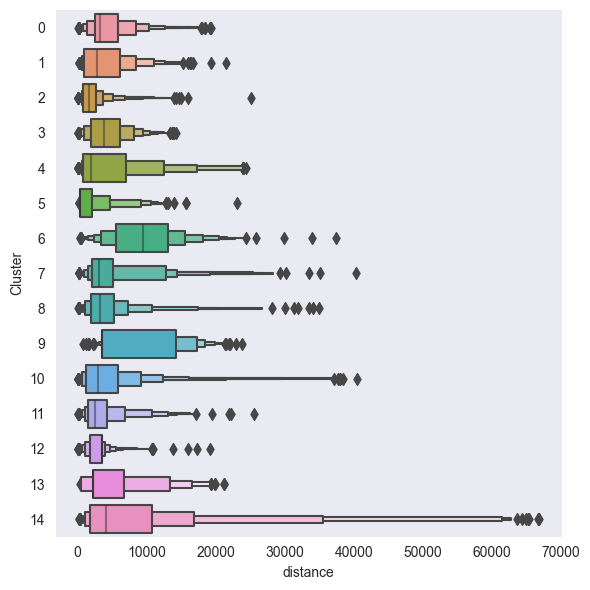

In [169]:
sns.catplot(x = 'distance', y = 'Cluster', data = data, kind = 'boxen', height=6)

<Axes: >

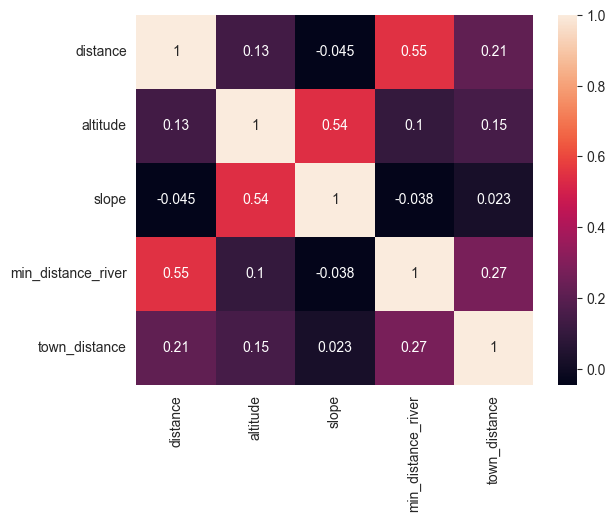

In [170]:
sns.heatmap(data.drop(['latitude', 'longitude', 'flood_risk', 'land_cover', 'Cluster'], axis = 1).corr(), annot = True)

<Axes: xlabel='land_cover', ylabel='count'>

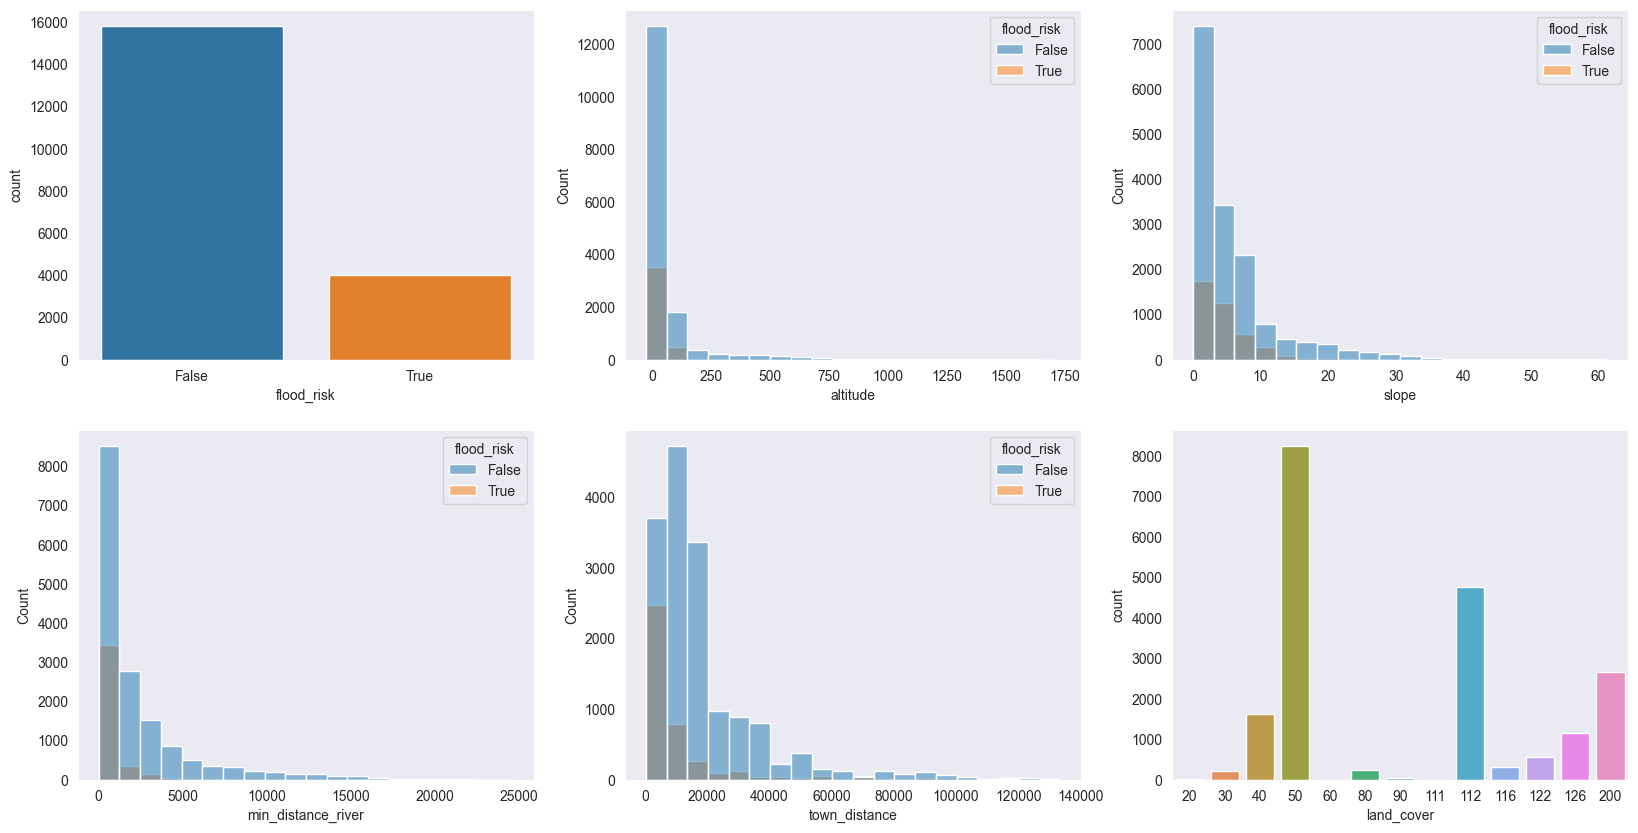

In [171]:
# use histogram and count plot to check on other columns
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.countplot(data = data, x = 'flood_risk')

plt.subplot(2, 3, 2)
sns.histplot(data = data, x = 'altitude', hue = 'flood_risk', bins = 20)

plt.subplot(2, 3, 3)
sns.histplot(data = data, x = 'slope', hue = 'flood_risk', bins = 20)

plt.subplot(2, 3, 4)
sns.histplot(data = data, x = 'min_distance_river', hue = 'flood_risk', bins = 20)

plt.subplot(2, 3, 5)
sns.histplot(data = data, x = 'town_distance', hue = 'flood_risk', bins = 20)

plt.subplot(2, 3, 6)
sns.countplot(data = data, x = 'land_cover')

- All columns seem to be highly skewed. We need to normalize them
- Does slope column need to be scaled?
    - We need to scale all the column or normalized them
    - LR does not need normalized data, so we only do scaling
- Land cover might need to be encoded
- For flood risk we need to perform either oversampling or under-sampling for a balanced classification dataset

In [172]:
# scale the numeric variable
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
col = ['distance', 'altitude', 'slope', 'min_distance_river', 'town_distance']
data[col] = scaler.fit_transform(data[col])
data.head()

,latitude,longitude,flood_risk,distance,altitude,slope,min_distance_river,land_cover,town_distance,Cluster
0,6.402858,100.098777,False,0.444654,-0.552632,-0.630429,0.992811,200,0.034116,0
1,6.365790,100.188445,False,0.526279,-0.447368,-0.278411,0.826312,40,-0.210129,0
2,6.360280,100.212395,False,0.735218,-0.421053,-0.278412,-0.197670,40,-0.147604,0
3,6.557335,100.314105,False,1.698753,1.000000,-0.472106,0.607107,126,0.603702,0
4,6.395771,100.230483,False,0.304492,-0.421053,-0.473142,0.610414,40,-0.359487,0


In [173]:
# change binary column to 0 and 1
data['flood_risk'] = data['flood_risk'].astype('int')

# change land cover to category type
data['land_cover'] = data['land_cover'].astype('category')

In [174]:
data.head()

,latitude,longitude,flood_risk,distance,altitude,slope,min_distance_river,land_cover,town_distance,Cluster
0,6.402858,100.098777,0,0.444654,-0.552632,-0.630429,0.992811,200,0.034116,0
1,6.365790,100.188445,0,0.526279,-0.447368,-0.278411,0.826312,40,-0.210129,0
2,6.360280,100.212395,0,0.735218,-0.421053,-0.278412,-0.197670,40,-0.147604,0
3,6.557335,100.314105,0,1.698753,1.000000,-0.472106,0.607107,126,0.603702,0
4,6.395771,100.230483,0,0.304492,-0.421053,-0.473142,0.610414,40,-0.359487,0


In [175]:
data['land_cover'].unique()

[200, 40, 126, 112, 122, ..., 90, 20, 30, 111, 60]
Length: 13
Categories (13, int64): [20, 30, 40, 50, ..., 116, 122, 126, 200]

In [176]:
# label encode the land cover and cluster
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['land_cover'] = le.fit_transform(data['land_cover'])
data['Cluster'] = le.fit_transform(data['Cluster'])

# Oversampling / Undersampling
https://beckernick.github.io/oversampling-modeling/#:~:text=By%20oversampling%20only%20on%20the,these%20results%20should%20be%20generalizable.

1. By oversampling before splitting into training and validation datasets, we will “bleed” information from the validation set into the training of the model.
2. By oversampling only on the training data, none of the information in the validation data is being used to create synthetic observations. So these results should be generalizable.

- Oversampling method:
    - create new synthetic examples in the minority class
- Under-sampling method: 
    - delete or merge examples in the majority class

In [177]:
# drop unwanted columns
y = data['flood_risk']
X = data.drop(['latitude', 'longitude', 'flood_risk'], axis = 1)

In [178]:
# perfrom train test split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,distance,altitude,slope,min_distance_river,land_cover,town_distance,Cluster
15359,1.086981,0.815789,0.591938,1.382841,8,-0.040591,8
7610,0.787803,0.552632,-0.314963,-0.087297,8,0.012700,3
7352,1.477247,7.131579,0.564876,0.889959,8,0.581269,3
13426,-0.235756,1.052632,0.974762,0.418710,8,-0.077140,2
9179,0.016046,-0.263158,0.324755,0.837306,8,0.584067,2


In [179]:
# perform oversampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

# Model Fitting and Evaluation

In [180]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear')

model.fit(X_train_s, y_train_s)
y_pred = model.predict(X_test)

In [181]:
model.coef_

array([[-3.04443450e+01, -8.89514301e-02, -3.54808098e-02,
        -1.56729039e-01, -1.93186601e-02, -4.24879117e-02,
        -7.18019827e-02]])

In [182]:
model.intercept_

array([-13.0812387])

In [183]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

0.9848675914249685
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3142
           1       0.93      1.00      0.96       823

    accuracy                           0.98      3965
   macro avg       0.97      0.99      0.98      3965
weighted avg       0.99      0.98      0.99      3965



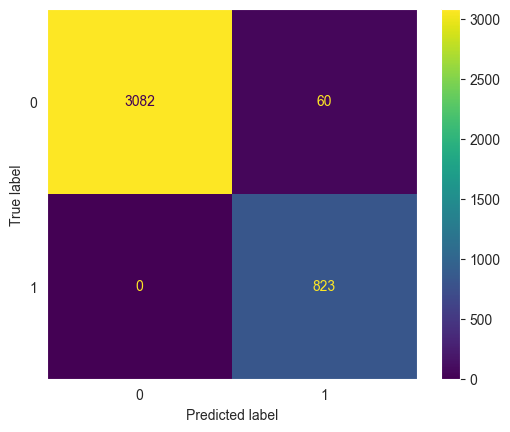

In [184]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# SHAP Explanation
- For educational purpose only
- Reference: https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

SHAP values are a way to explain the output of any ML model. Each feature will be assigned an importance value representing its contribution to the model's output.
1. SHAP values are additive, the contribution of each feature to the final prediction can be computed independently and then summed up
2. SHAP values add up to the difference between the expected model output and the actual output for a given input. 
3. SHAP values are zero for missing or irrelevant features for a prediction. This makes SHAP values robust to missing data and ensures that irrelevant features do not distort the interpretation.
4. SHAP values do not change when the model changes unless the contribution of a feature changes. (consistent)

In [186]:
import shap
shap.initjs()

In [187]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_s, y_train_s)

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

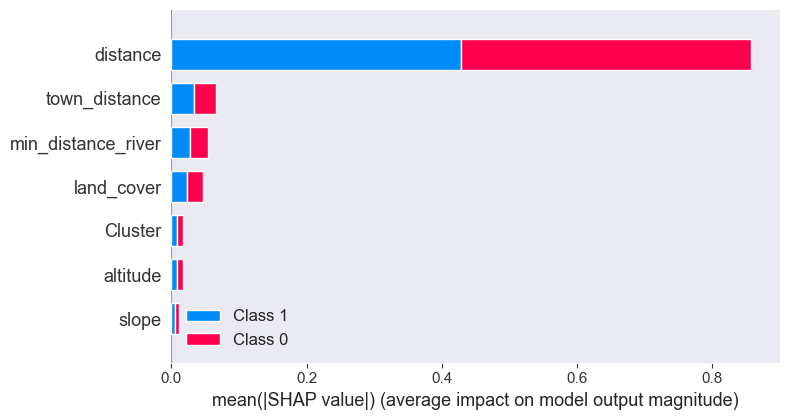

In [188]:
shap.summary_plot(shap_values, X_test)

- From the plot above we can see that 'distance' play a major role in determining the results

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


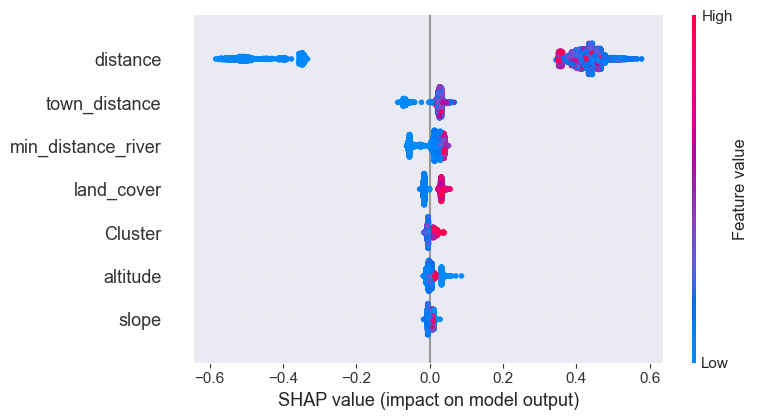

In [189]:
shap.summary_plot(shap_values[0], X_test)

- Distance impacts the output the most, high distance improve the accuracy

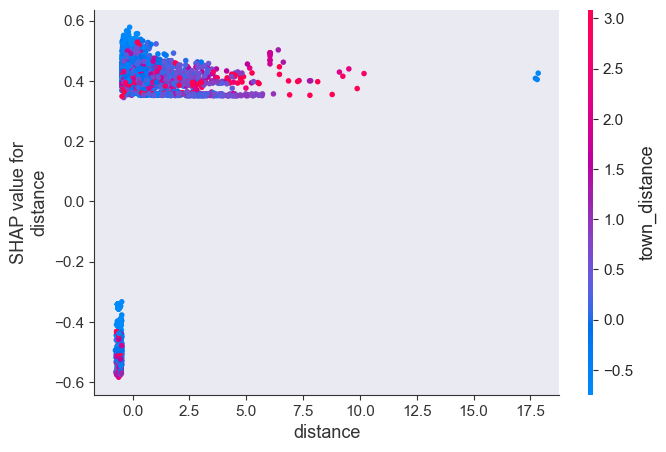

In [190]:
shap.dependence_plot("distance", shap_values[0], X_test,interaction_index="town_distance")

In [191]:
plt.figure(figsize=(32, 10))
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :])

<Figure size 3200x1000 with 0 Axes>

- Features contribute to the zero results which means no flood risk
- land_cover class 3 or open forest, such location can contribute to no flood risk

In [192]:
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :])

- Similar to above open forest contributes to no flood risk, other variables contributed to flood risk